In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler

alzh_data = pd.read_csv('alzheimer.csv')
alzh_data.head(10)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,Nondemented,M,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,Nondemented,M,85,12,4.0,30.0,0.0,1699,0.705,1.033


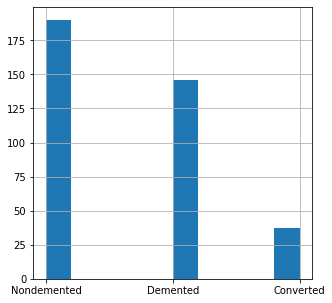

In [2]:
alzh_data["Group"].hist(figsize=(5,5))
plt.show()

In [3]:
print(alzh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None


In [4]:
alzh_data["SES"].fillna(alzh_data["SES"].mean(), inplace=True)
alzh_data["MMSE"].fillna(alzh_data["MMSE"].mean(), inplace=True)

alzh_data = alzh_data[alzh_data['Group'].isin(['Demented','Nondemented'])]

alzh_data.head(10)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
5,Nondemented,F,88,18,3.000000,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.000000,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.000000,28.0,0.0,1689,0.712,1.039
8,Nondemented,M,83,12,4.000000,29.0,0.5,1701,0.711,1.032
9,Nondemented,M,85,12,4.000000,30.0,0.0,1699,0.705,1.033


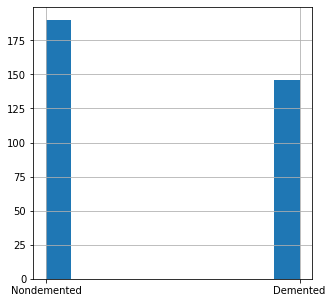

In [5]:
alzh_data["Group"].hist(figsize=(5,5))
plt.show()

In [6]:
group_to_idx = {'Nondemented': 0, 'Demented': 1}
idx_to_group = {group_to_idx[k]:k for k in group_to_idx.keys()}

sex_to_idx = {'M': 0, 'F': 1}
idx_to_sex = {sex_to_idx[k]:k for k in sex_to_idx.keys()}

alzh_data.replace(group_to_idx, inplace=True)
alzh_data.replace(sex_to_idx, inplace=True)

alzh_data

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.000000,30.0,0.0,1327,0.796,1.323


<AxesSubplot:>

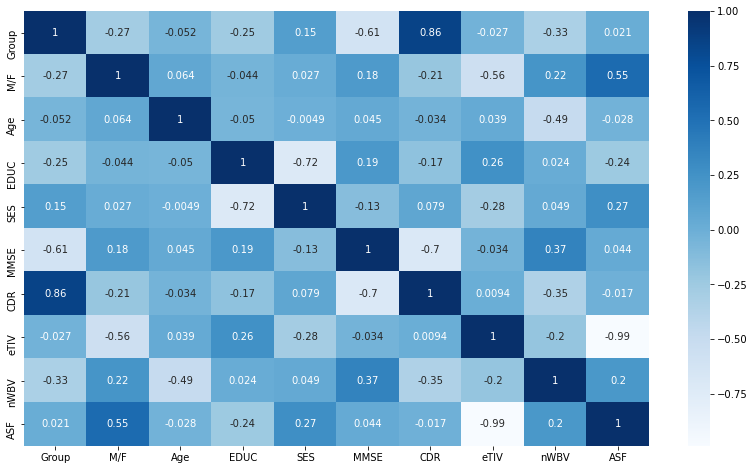

In [7]:
plt.figure(figsize=(14,8))

corr = alzh_data.corr()

sns.heatmap(corr, 
        cmap="Blues", annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [8]:
x = alzh_data.drop("Group",axis=1)
y = alzh_data["Group"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.metrics import f1_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
lr_clf = LogisticRegression().fit(X_train,y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[59  1]
 [ 0 41]]
정확도: 0.9901, 정밀도: 0.9762, 재현율: 1.0000,    F1: 0.9880, AUC:0.9951


C:\Users\jh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , rf_pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9901


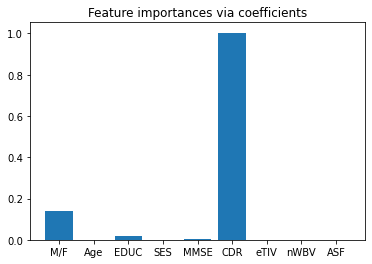

In [12]:
from sklearn.linear_model import LassoCV
lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)

feature_names = ['M/F','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [13]:
x = alzh_data.drop("Group",axis=1)
x1 = x.drop("CDR", axis=1)
y = alzh_data["Group"]

X_train, X_test, y_train, y_test = train_test_split(x1,y,test_size=0.3,random_state=0)

In [14]:
lr_clf = LogisticRegression().fit(X_train,y_train)

lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[52  8]
 [16 25]]
정확도: 0.7624, 정밀도: 0.7576, 재현율: 0.6098,    F1: 0.6757, AUC:0.8390


C:\Users\jh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


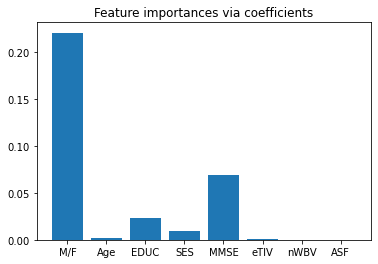

In [15]:
lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)

feature_names = ['M/F','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF']
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [16]:
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.8911


In [17]:
import time
import warnings
warnings.filterwarnings('ignore')

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.8515


In [18]:
xgb_clf = XGBClassifier(verbose=False).fit(X_train,y_train)
predict = xgb_clf.predict(X_test)

print(accuracy_score(y_test,predict))

[15:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:41:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8415841584158416


In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 정확도: {0:.4f}'.format(accuracy))

결정 트리 정확도: 0.8416


----------------------------
RandomForestClassifier: 
Accuracy: 0.8910891089108911
----------------------------
GradientBoostingClassifier: 
Accuracy: 0.8514851485148515
----------------------------
XGBClassifier: 
Accuracy: 0.8415841584158416
----------------------------
DecisionTreeClassifier: 
Accuracy: 0.8415841584158416
----------------------------
LogisticRegression: 
Accuracy: 0.7623762376237624


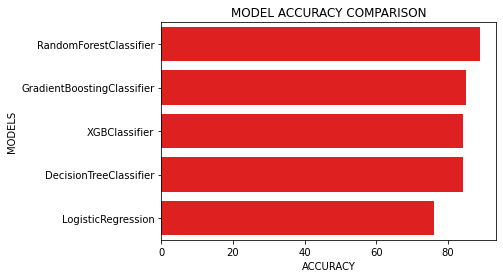

In [23]:
models = [rf_clf,gb_clf,xgb_clf,dt_clf,lr_clf]
r = pd.DataFrame(columns=["MODELS","ACC"])

for model in models:
    name = model.__class__.__name__
    predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="r")
plt.xlabel("ACCURACY")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()